In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import warnings

warnings.filterwarnings('ignore')

In [2]:
pools = ['Pool_49', 'Pool_52', 'Pool_60']
algorithms = ['DeepNovo', 'PEAKS', 'Novor','DirecTag']
alg_file = ['deepnovo', 'peaks', 'novor','direcTag']

RESULT_DIR = '../../../Data/Analysis_new/'

In [3]:
experiment_data_dict = {}

for p in pools:
    pool_dict = {}
    for alg, file in zip(algorithms, alg_file):
        raw_data =pd.read_csv(
            f"../../../Data/Datasets/{p}/Thermo_SRM_{p}_01_01_3xHCD-1h-R2-tryptic/msmsScans.txt",
            sep='\t', index_col=None)
        pool_dict[alg] = raw_data [['Scan number', 'Identified', 'Sequence']]
    experiment_data_dict[p] = pool_dict



In [4]:
parsed_data_dict = {}

for p in pools:
    pool_dict = {}
    for alg, file in zip(algorithms, alg_file):
        parsed_data = pd.read_csv(f'../../../Data/ParsingResults/{p}/{file}_results_all_sequences.tsv', sep='\t', index_col=None)
        pool_dict[alg] = parsed_data
    parsed_data_dict[p] = pool_dict



In [5]:
scored_data_dict = {}

for p in pools:
    pool_dict = {}
    for alg, file in zip(algorithms, alg_file):
        file = file+'_scored'
        if file == 'direcTag_scored':
            file = file + '_grouped'

        identified_maxquant = pd.read_csv(f'../../../Data/ScoringResults/{p}/{file}.tsv', sep='\t', index_col=None, header=0)
        identified_maxquant['by'] = 'MaxQuant'
        identified_inclusion_list= pd.read_csv(f'../../../Data/ScoringResults_Unidentified/CheckInclusionList/{p}/{file}.tsv', sep='\t', index_col=None, header=0)
        identified_inclusion_list['by'] = 'InclusionList'
        pool_dict[alg] = pd.concat([identified_maxquant, identified_inclusion_list], axis=0)

    scored_data_dict[p] = pool_dict



DeepNovo:
      Pool  Min   Q1  Median   Q3  Max
0  Pool_49    0  2.0     4.0  8.0   20
1  Pool_52    0  2.0     3.0  7.0   32
2  Pool_60    0  1.0     2.0  5.0   23 

PEAKS:
      Pool  Min   Q1  Median   Q3  Max
0  Pool_49    0  0.0     2.0  4.0   24
1  Pool_52    0  0.0     2.0  4.0   30
2  Pool_60    0  0.0     1.0  4.0   19 

Novor:
      Pool  Min   Q1  Median   Q3  Max
0  Pool_49    0  1.0     2.0  6.0   25
1  Pool_52    0  0.0     2.0  5.0   32
2  Pool_60    0  0.0     2.0  5.0   19 

DirecTag:
      Pool  Min   Q1    Median    Q3   Max
0  Pool_49  3.0  8.0  9.700000  11.4  24.0
1  Pool_52  4.0  7.4  9.166667  11.0  34.9
2  Pool_60  4.0  6.0  8.000000  13.0  19.0 



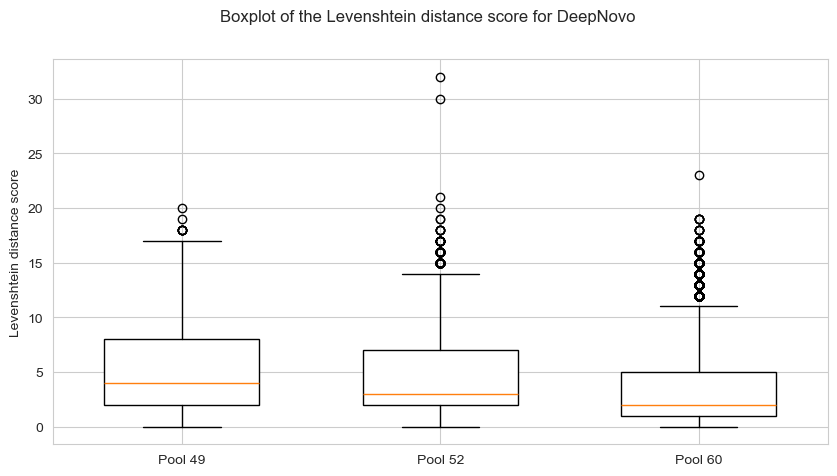

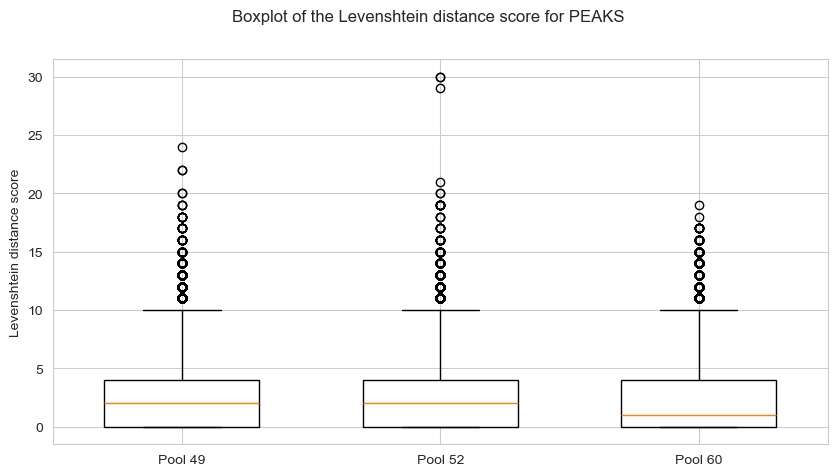

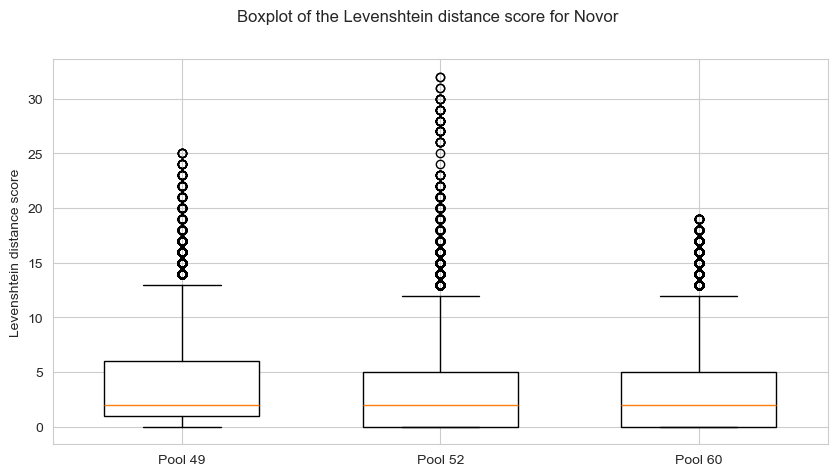

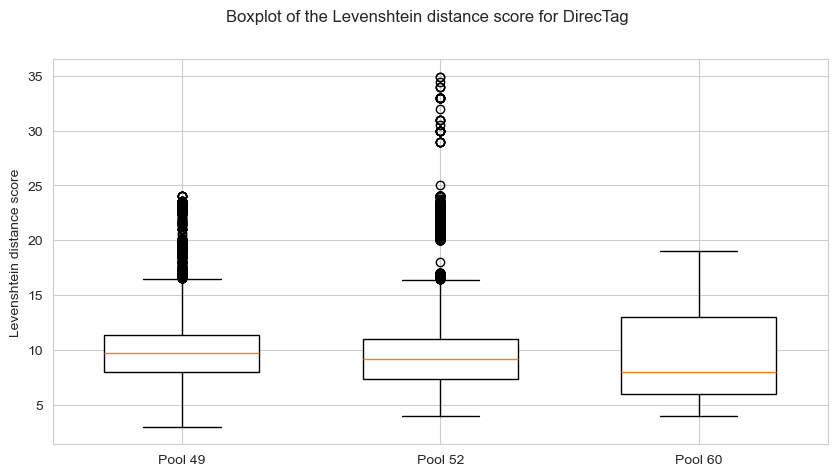

In [7]:
for alg, file in zip(algorithms, alg_file):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True)
    #ax.grid()
    fig.set_size_inches(10, 5)
    min_dict=dict()
    median_dict=dict()
    q1_dict=dict()
    q3_dict=dict()
    max_dict=dict()
    for pool in pools:
        scored_df = scored_data_dict[pool][alg]
        # print boxplot of the identity score
        ax.boxplot(scored_df['Levenshtein'], positions=[pools.index(pool)], widths=0.6, patch_artist=True, boxprops=dict(facecolor='white'))
        median_dict[pool] = scored_df['Levenshtein'].median()
        q1_dict[pool] = scored_df['Levenshtein'].quantile(0.25)
        q3_dict[pool] = scored_df['Levenshtein'].quantile(0.75)
        max_dict[pool] = scored_df['Levenshtein'].max()
        min_dict[pool] = scored_df['Levenshtein'].min()
    ax.set_xticks(range(len(pools)))
    ax.set_ylabel('Levenshtein distance score')
    ax.set_xticklabels([' '.join(x.split('_')) for x in pools])
    print(alg+":")
    print(pd.DataFrame({'Pool':median_dict.keys(), 'Min':min_dict.values() , 'Q1': q1_dict.values(), 'Median': median_dict.values(), 'Q3': q3_dict.values(), 'Max': max_dict.values()}), '\n')
    # fig.tight_layout()
    fig.suptitle(f'Boxplot of the Levenshtein distance score for {alg}')
    fig.savefig(f'{RESULT_DIR}{alg}/all_pools_boxplot_levenshtein.png')